# Descripción del dataset

Usando el conjunto de datos de [food-101](https://www.kaggle.com/datasets/dansbecker/food-101) que nos presenta un archivo comprimido con miles de imágenes de comidas comunes.

Por el cual procedemos a mostrar por medio de un *Dataframe* de la librería **pandas** los labels existentes en nuestro dataset.

Posteriormente, en el siguiente apartado se quiere buscar la dirección de la imágen según el orden de los directorios que se manejan de la siguiente forma ***Comida*/*número del archivo***. Se busca tomar los primeros 2 una vez que se haya usado el método *shuffle* que busca reordenar el arreglo de forma aleatoria, para de esta forma mostrar algunas de las imágenes existentes, si se desea poder ver más imágenes se puede volver a correr los correspondientes bloques de código. 


In [1]:
# Declaración de algunos de los paquetes que se estarán utilizando dentro de este archivo
import time, cv2, os
import pandas as pd
from random import shuffle
from matplotlib import pyplot as plt

In [2]:
PATH = "../../dataset/food-101/food-101/meta/labels.txt"
LABELS = []
print("Extracting labels...")
time.sleep(2)

with open(PATH, "r") as labels:
    for line in labels:
        LABELS.append(line[:-1])

df_labels = pd.DataFrame(data=LABELS, columns=["Labels"])
df_labels

Extracting labels...


,Labels
0,Apple pie
1,Baby back ribs
2,Baklava
3,Beef carpaccio
4,Beef tartare
...,...
96,Tacos
97,Takoyaki
98,Tiramisu
99,Tuna tartare


In [3]:
PATH = "../../dataset/food-101/food-101/meta/test.txt"
IMG_NAMES = []
print("Extracting data for show images...")
time.sleep(2)

with open(PATH, "r") as train: 
    for line in train:
        IMG_NAMES.append(line[:-1])
    shuffle(IMG_NAMES)
    IMG_NAMES_COPY = IMG_NAMES[:2]

df_img_names = pd.DataFrame(columns=["Label","Name"])
for name in IMG_NAMES:
    new_row = pd.DataFrame(data=[[name.split("/")[0], name.split("/")[1]]], columns=["Label","Name"])
    df_img_names = pd.concat([df_img_names, new_row]).reset_index(drop=True)
df_img_names        

Extracting data for show images...


,Label,Name
0,takoyaki,286501
1,french_onion_soup,3808030
2,churros,3008612
3,hamburger,1065477
4,clam_chowder,1598939
...,...,...
25245,pork_chop,1707225
25246,shrimp_and_grits,611925
25247,onion_rings,3029853
25248,lobster_roll_sandwich,2774681


## Extracción de las imagenes

Por medio de la extracción del nombre de las imágenes en el proceso anterior las pasamos por la función *imread* de la librería *cv2* que nos permitirá leer las imágenes y tenerlas en un arreglo para su posterior presentación con la librería **matplotlib**

In [4]:
images = [cv2.imread(f'/home/jonasaray/Workspace/NutricionAI/nutricionBackend/dataset/food-101/food-101/images/{img}.jpg') for img in IMG_NAMES_COPY]

Text(0.5, 0, 'french_onion_soup')

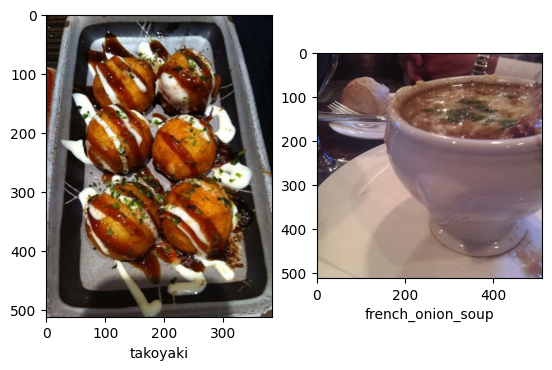

In [5]:
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[0].split("/")[0])
plt.margins(y=10)

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[1].split("/")[0])

# Vista minable

A partir del preview anterior tenemos una idea del proceso del cuál será parte la extracción de los datos para el modelo que se desea entrenar. Tomamos el mismo proceso anterior pero apartando 1000 imágenes que serán tomadas como imágenes de entrenamiento y prueba del modelo basado en las etiquetas que se tomen primero que serán guardadas en un archivo aparte para poder usarlas posteriormente.

In [6]:
PATH = "../../dataset/food-101/food-101/meta/test.txt"
IMG_NAMES = []
print("Extracting data for show images...")
time.sleep(2)

with open(PATH, "r") as train: 
    for line in train:
        IMG_NAMES.append(line[:-1])
    shuffle(IMG_NAMES)
    IMG_NAMES = IMG_NAMES[:1000]

df_img_names = pd.DataFrame(columns=["Label","Name"])
for name in IMG_NAMES:
    new_row = pd.DataFrame(data=[[name.split("/")[0], name.split("/")[1]]], columns=["Label","Name"])
    df_img_names = pd.concat([df_img_names, new_row]).reset_index(drop=True)
df_img_names["Label"].unique()

Extracting data for show images...


array(['seaweed_salad', 'frozen_yogurt', 'huevos_rancheros', 'gnocchi',
       'carrot_cake', 'chicken_curry', 'omelette', 'grilled_salmon',
       'caprese_salad', 'clam_chowder', 'hot_dog', 'hot_and_sour_soup',
       'caesar_salad', 'french_fries', 'beignets', 'hamburger',
       'pad_thai', 'cannoli', 'lasagna', 'tiramisu',
       'spaghetti_bolognese', 'pho', 'grilled_cheese_sandwich',
       'deviled_eggs', 'apple_pie', 'guacamole', 'spaghetti_carbonara',
       'red_velvet_cake', 'spring_rolls', 'chicken_wings', 'fried_rice',
       'breakfast_burrito', 'french_onion_soup', 'fried_calamari',
       'pulled_pork_sandwich', 'steak', 'macaroni_and_cheese',
       'cheese_plate', 'ceviche', 'sashimi', 'baby_back_ribs',
       'croque_madame', 'onion_rings', 'shrimp_and_grits', 'oysters',
       'samosa', 'waffles', 'dumplings', 'fish_and_chips', 'cup_cakes',
       'lobster_roll_sandwich', 'paella', 'scallops', 'french_toast',
       'donuts', 'nachos', 'baklava', 'chicken_quesadill

In [7]:
os.makedirs('../../dataset/vista_minable/meta', exist_ok=True)
df_img_names.to_csv('../../dataset/vista_minable/meta/train_test_labels.csv', encoding='utf-8')

## Procesamiento de las imagenes para entrenamiento

Una vez procesada la información de las imágenes que serán usadas para el entrenamiento del modelo procedemos a identificar las imágenes con un algoritmo que nos permite redimencionarlas para que sea más fácil para el modelo identificar las diferencias entre las mismas para de esta forma clasificarlas. Utilizaremos los siguientes pasos

1. Sacar la información guardada en el archivo de la vista minable.
2. Bajo un esquema similar al de la extracción de imágenes que se muestra con anterioridad pero con las 1000 imágenes que fueron apartadas.
3. Pasar cada imagen por la función resize de nuestra librería para asegurarnos que la misma tenga el formato deseado (28x28).